# Code snippet to seperate the halo and prompt photons into seperate data files for GAN training

load libraries and dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


load the original data set

In [2]:
data_set = np.loadtxt("output0.csv")
(x_train, y_train) = (data_set[:,0:81],data_set[:,81])
X_Net = x_train.reshape(x_train.shape[0],9,9,1)
Y_Net = to_categorical(y_train,2)

Defining a function that displays the data as image with the proper classification

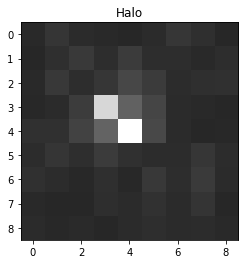

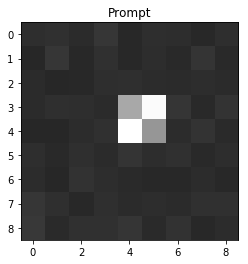

In [3]:
def display_deposition_with_classification(i):
    def name(Y_Net):
        if Y_Net[0] == 1:
            return "Halo"
        elif Y_Net[0] == 0:
            return "Prompt"
    xx = X_Net[i,:].reshape(9,9)
    plt.imshow(xx,alpha=0.85, cmap='gray')
    plt.title(name(Y_Net[i,:]))
    plt.show()

for i in range(2):
    display_deposition_with_classification(i)

Seperating the indices 

In [4]:
halo_index = []
prompt_index = []
for i in  range(X_Net.shape[0]):
    if y_train[i] == 0:
        halo_index.append(i)
    else:
        prompt_index.append(i)
# print(halo_index, prompt_index)

seperating the data

In [5]:
halo = []
for item in halo_index:
    halo.append(np.hstack((x_train[item],y_train[item])))
prompt = []
for iterations in prompt_index:
    prompt.append(np.hstack((x_train[iterations],y_train[iterations])))

Save the data as csv

In [7]:
np.savetxt("prompt_data.csv",prompt,delimiter=",")
np.savetxt("halo_data.csv", halo, delimiter=",")

Now load the data sets from the csv and check if everything is in order

In [8]:
halo_data = np.loadtxt("halo_data.csv", delimiter=",")
prompt_data = np.loadtxt("prompt_data.csv", delimiter=",")

In [9]:
(x_halo, y_halo) = (halo_data[:,0:81], halo_data[:,81])

(x_prmpt, y_prmpt) = (prompt_data[:,0:81], prompt_data[:,81])


printing the data set shapes

In [10]:
print(halo_data.shape, prompt_data.shape)

(35052, 82) (34948, 82)


A final check, printing the y list will suffice (why is that exactly?)

In [11]:
print(y_halo, y_prmpt)

[0. 0. 0. ... 0. 0. 0.] [1. 1. 1. ... 1. 1. 1.]
